In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
# Check Data

df = pd.read_csv('n2oDataset.csv')
df

year  month   decimal  average  average_unc  trend  trend_unc
0    2001      1  2001.042    316.3          0.2  316.0        0.1
1    2001      2  2001.125    316.3          0.2  316.1        0.1
2    2001      3  2001.208    316.2          0.2  316.2        0.1
3    2001      4  2001.292    316.1          0.1  316.2        0.1
4    2001      5  2001.375    316.1          0.1  316.3        0.1
..    ...    ...       ...      ...          ...    ...        ...
250  2021     11  2021.875    334.9         -9.9  334.8       -9.9
251  2021     12  2021.958    335.1         -9.9  334.9       -9.9
252  2022      1  2022.042    335.3         -9.9  335.0       -9.9
253  2022      2  2022.125    335.3         -9.9  335.1       -9.9
254  2022      3  2022.208    335.4         -9.9  335.3       -9.9

[255 rows x 7 columns]

In [19]:
df.shape
total = df.shape[0]
total

255

In [20]:
# Check for stationarity

from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [21]:
adfuller_test(df['average'])

ADF Test Statistic : 2.811036555304038
p-value : 1.0
#Lags Used : 13
Number of Observations : 241
weak evidence against null hypothesis, indicating it is non-stationary 


In [22]:
adfuller_test(df['average'].diff(1).dropna())
# d = 1 makes data stationary

df['diff'] = df['average'].diff(1).dropna()

ADF Test Statistic : -3.072880194979604
p-value : 0.028626367024291655
#Lags Used : 12
Number of Observations : 241
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


C:\Users\Patrick\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


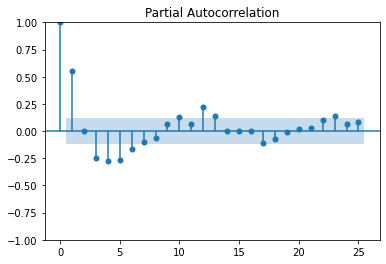

In [24]:
# Check acf/pacf plots for p and q values
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig1 = plot_pacf(df['diff'].dropna())

In [26]:
fig2 = plot_acf(df['diff'].dropna())

In [27]:
split = round(df['average'].shape[0]*.9)
split

230

In [28]:
dftrain = df['average'][:split]
dftest = df['average'][split:]

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

def eval_model(actual, predict):
    rmse = f'RMSE = {mean_squared_error(y_true=actual, y_pred=predict, squared=False):.2f}'
    mape = f'MAPE = {mean_absolute_percentage_error(y_true=actual, y_pred=predict):.2f}'
    mae = f'MAE = {mean_absolute_error(y_true=actual, y_pred=predict):.2f}'
    
    print(f'{rmse}\n{mape}\n{mae}')

In [63]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(dftrain, order=(3,2,3))
modelfit = model.fit()
predict = modelfit.forecast(total-split)

C:\Users\Patrick\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Patrick\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Patrick\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
plt.plot(dftrain, label='Train')
plt.plot(dftest, label='Test')
plt.plot(predict, label='Predict')
plt.legend(loc='upper left')
plt.show()

In [65]:
eval_model(dftest,predict)

RMSE = 0.51
MAPE = 0.00
MAE = 0.42


In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.seasonal import seasonal_decompose

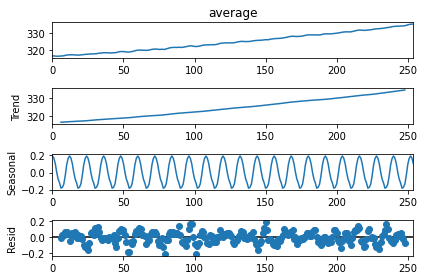

In [67]:
sdecomplot = seasonal_decompose(df['average'], period=12, model='additive').plot()

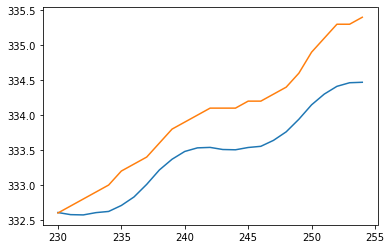

In [68]:
modelfit = HWES(dftrain, trend='add', seasonal='add', seasonal_periods=12).fit()
predict = modelfit.forecast(total-split)
plt.plot(predict)
plt.plot(dftest)
plt.show()

In [69]:
eval_model(dftest,predict)

RMSE = 0.58
MAPE = 0.00
MAE = 0.53


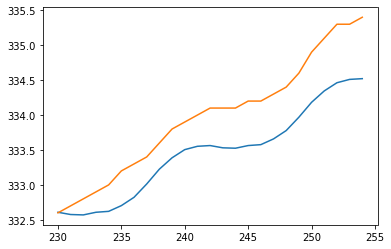

In [70]:
modelfit = HWES(dftrain, trend='mul', seasonal='mul', seasonal_periods=12).fit()
predict = modelfit.forecast(total-split)
plt.plot(predict)
plt.plot(dftest)
plt.show()

In [71]:
eval_model(dftest,predict)

RMSE = 0.56
MAPE = 0.00
MAE = 0.51
